1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión linear multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

In [2]:
win = pd.read_csv("https://raw.githubusercontent.com/Gabvaztor/data_science_jun_2020/master/week8/day3/data/usuarios_win_mac_lin.csv")
win.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [3]:
win.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


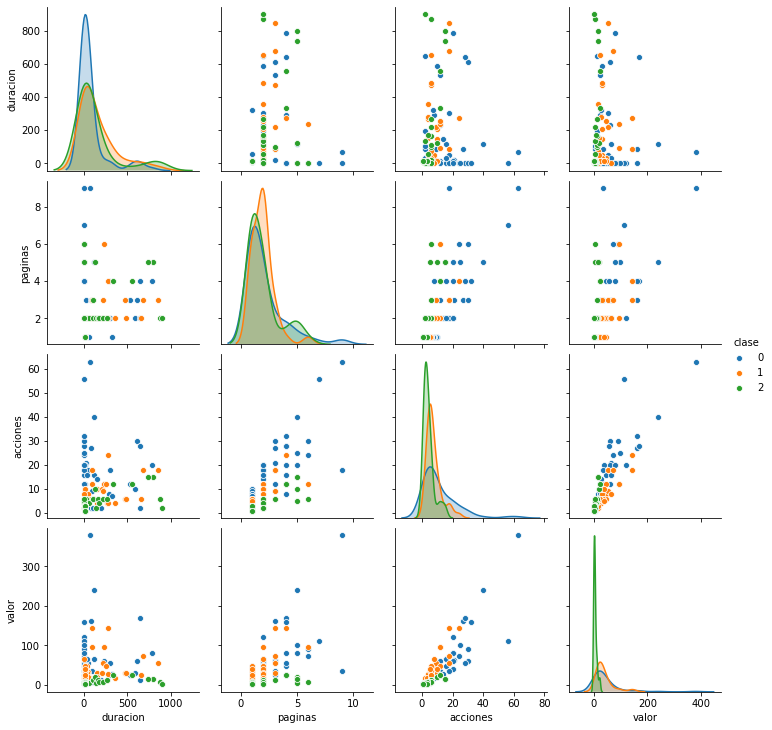

In [4]:
sns.pairplot(win, hue = "clase")

In [5]:
X = win.drop("duracion", 1)
y = win.duracion

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [7]:
model = LinearRegression()

In [8]:
model.fit(X_train,y_train)

LinearRegression()

In [9]:
model.intercept_

5.70768346787942

In [10]:
model.coef_

array([39.78351471,  3.44383187, -0.7874622 , 22.05874179])

In [11]:
df_coef = pd.DataFrame(model.coef_, X.columns, columns=['coef_'])
df_coef

,coef_
paginas,39.783515
acciones,3.443832
valor,-0.787462
clase,22.058742


In [12]:
prediction = model.predict(X_test)
prediction

array([ 99.05984054,  63.70711596, 147.48511722, 113.82212629,
        68.43188917,  94.92142109,  43.02380251, 147.76857823,
        41.64837418,  46.37314738,  95.21540416,  71.87572104,
        82.71283022,  41.54336511,  55.22420559, 104.74072771,
        56.30565086, 104.37257988,  57.20792229,  47.54907965,
        47.54907965,  47.84306272,  89.01252783,  95.21540416,
       111.65923575, 144.15609459,  35.24366751, 110.86125148,
       134.7049358 ,  47.65408872,  54.14276032,  40.36743284,
       397.39965031,  97.57779076])

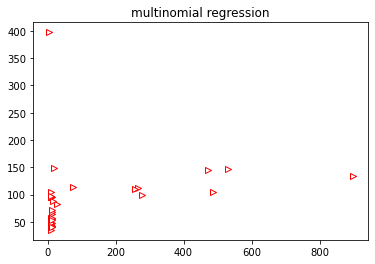

In [13]:
plt.scatter(y_test, prediction, color='white', marker = ">", edgecolor = "red")
plt.title("multinomial regression")
plt.show()

**¿Qué acierto tiene? (score)**

In [14]:
model.score(X, y)

0.09847785787514851

In [15]:
model.score(X_train, y_train)

0.10752780504072001

In [16]:
model.score(X_test, y_test)

0.06164648275806428

**¿Cuál es el RMSE? ¿Dirías que es un valor alto?**

In [17]:
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, prediction))}')

RMSE: 195.9901499109071


**Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?**

In [18]:
corr_matrix = win.corr()
corr_matrix

,duracion,paginas,acciones,valor,clase
duracion,1.000000,0.277550,0.163028,0.090869,0.128706
paginas,0.277550,1.000000,0.724061,0.583910,-0.052813
acciones,0.163028,0.724061,1.000000,0.862961,-0.329954
valor,0.090869,0.583910,0.862961,1.000000,-0.322737
clase,0.128706,-0.052813,-0.329954,-0.322737,1.000000


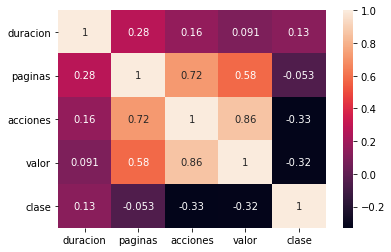

In [19]:
sns.heatmap(corr_matrix, annot = True)

**¿Es la regresión un buen método para este dataset?**

Observando los datos que tenemos vemos que al ser valores continuos lo que encontramos en la columna `duración`, este es un problema de regresión.

Pero en todo caso, la regresión linear es un buen método solo para las columnas `acciones` y `valor` que como se observa más abajo, hay una relación lineal entre ellas. 

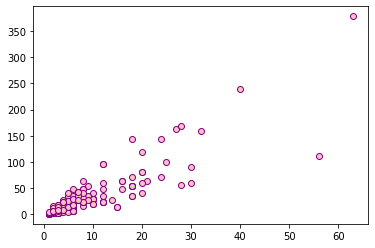

In [20]:
plt.scatter(win.acciones, win.valor, color='pink', edgecolor = "purple")

In [21]:
X_2 = np.array(win.acciones).reshape(-1,1)
y_2 = win.valor

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.20)

model_2 = LinearRegression()

model_2.fit(X_train_2, y_train_2)

model_2.predict(X_test_2)

array([ 24.83627328, 127.32262918,   8.43845634,  28.93572752,
         0.23954787,  20.73681905, 160.11826307,  82.22863259,
         4.3390021 ,  37.13463599,  12.53791057,  12.53791057,
        16.63736481,  45.33354446,  12.53791057,  57.63190717,
        28.93572752,   4.3390021 ,  12.53791057,  20.73681905,
         0.23954787,  69.93026988,  12.53791057,  45.33354446,
        20.73681905,   4.3390021 ,  37.13463599,  28.93572752,
        20.73681905,   8.43845634,  20.73681905,  24.83627328,
        28.93572752,   4.3390021 ])

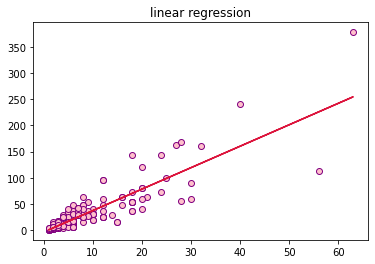

In [22]:
plt.scatter(X_2, y_2, color='pink', edgecolor = "purple")
plt.plot(X_2, model_2.predict(X_2), color='crimson')
plt.title("linear regression")
plt.show()

In [23]:
model_2.score(X_2, y_2)

0.743720346533455

In [24]:
model_2.score(X_test_2, y_test_2)

0.7776354881091879